# 零基础入门数据挖掘-Task2 数据分析

## 二、 EDA-数据探索性分析

Tip:此部分为零基础入门数据挖掘的 Task2  EDA-数据探索性分析 部分，带你来了解数据，熟悉数据，和数据做朋友，欢迎大家后续多多交流。

**赛题：零基础入门数据挖掘 - 二手车交易价格预测**

地址：https://tianchi.aliyun.com/competition/entrance/231784/introduction


## 2.1 EDA目标

* EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。

* 当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系。

* 引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠。

* 完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结并打卡。

## 2.2  数据探索（EDA）

在sk-dm依赖库中定义的数据探索功能清单：

1.  载入各种数据科学以及可视化库:
    - 数据科学库 pandas、numpy、scipy；
    - 可视化库 matplotlib、seabon；
    - 其他；
2.  载入数据：
    - 载入训练集和测试集；
3.  总览数据概况(explore_data_overall):传入dataframe参数
    - 通过shape来查看数据的形状，shape[0]表示行数，shape[1]表示列数
    - 通过head()和tail()查看数据的前5条和后5条，大概浏览数据
    - 通过describe()来熟悉数据的相关统计量
    - 通过info()来熟悉数据类型
4.  查看数据缺失情况(explore_data_missing)：传入dataframe参数
    - 查看每列的缺失比例
    - 可视化缺失情况
5.  查看异常值情况(explore_data_abnormal)：传入dataframe参数
    - 箱型图查看数据分布情况
6.  查看标签分布情况(explore_label)：传入dataframe和标签参数
    - 通过describe()查看连续性标签的情况
    - 通过value_counts()查看离散型标签的情况
    - 可视化标签的分布情况
7.  数字特征分析(explore_numeric_features)：传入dataframe和数字特征列表参数
    - 相关性分析
    - 每个数字特征的分布可视化
    - 特征之间的相关性可视化
8.  类型特征分析(explore_categorical_features)：传入dataframe和类别特征列表参数
    - 类别数统计
    - 类别特征分布情况
9. 用pandas_profiling生成数据报告(generate_eda_report)：传入dataframe参数

    

In [130]:
# 从sk-dm依赖库中取需要的功能单元，拼凑我自定义的数据探索模块
def data_explore(data):
    # 总览数据概况
    explore_data_overall(data)
    # 查看数据缺失情况
    explore_data_missing(data)
    # 查看异常值情况
    explore_data_abnormal(data)
    # 查看标签分布情况
    explore_label(data,target)
    # 数字特征分析
    explore_numeric_features(data,numeric_features_list)
    # 类型特征分析
    explore_categorical_features(data,categorical_features_list)
    # 生成数据分析报告
    generate_eda_report()
    
# 数据准备、数据探索、特征工程、数据建模、模型评估以此类推

def data_prepare():
    pass
def data_explore():
    pass
def feature_engineering():
    pass
def data_model():
    pass
def model_evaluation():
    pass

# 实际项目的开发：

# 数据准备
data_prepare()
# 数据探索
data_explore()
# 特征工程
feature_engineering()
# 数据建模
data_model()
# 模型评估
model_evaluation()

## 2.3 代码示例

### 2.3.1 导入依赖
以下库都是pip install 安装， 有特殊情况我会单独说明
例如 pip install pandas  -i https://pypi.tuna.tsinghua.edu.cn/simple

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [131]:
#coding:utf-8
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 2.3.2 读取数据

In [132]:
Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv('used_car_testB_20200421.csv', sep=' ')

### 所有特征集均脱敏处理(方便大家观看)
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

要养成看数据集的head()以及shape的习惯，这会让你每一步更放心，导致接下里的连串的错误, 如果对自己的pandas等操作不放心，建议执行一步看一下，这样会有效的方便你进行理解函数并进行操作

### 2.3.3 总览数据概况

In [133]:
Train_data.shape

(150000, 31)

In [134]:
Test_data.shape

(50000, 30)

In [135]:
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [136]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,...,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [137]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [138]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [139]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [140]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

### 2.3.4 查看数据缺失情况

In [141]:
Train_data.isnull().sum()/Train_data.isnull().count()

SaleID               0.000000
name                 0.000000
regDate              0.000000
model                0.000007
brand                0.000000
bodyType             0.030040
fuelType             0.057867
gearbox              0.039873
power                0.000000
kilometer            0.000000
notRepairedDamage    0.000000
regionCode           0.000000
seller               0.000000
offerType            0.000000
creatDate            0.000000
price                0.000000
v_0                  0.000000
v_1                  0.000000
v_2                  0.000000
v_3                  0.000000
v_4                  0.000000
v_5                  0.000000
v_6                  0.000000
v_7                  0.000000
v_8                  0.000000
v_9                  0.000000
v_10                 0.000000
v_11                 0.000000
v_12                 0.000000
v_13                 0.000000
v_14                 0.000000
dtype: float64

In [24]:
Test_data.isnull().sum()/Test_data.isnull().count()

SaleID               0.00000
name                 0.00000
regDate              0.00000
model                0.00000
brand                0.00000
bodyType             0.03008
fuelType             0.05848
gearbox              0.03936
power                0.00000
kilometer            0.00000
notRepairedDamage    0.00000
regionCode           0.00000
seller               0.00000
offerType            0.00000
creatDate            0.00000
v_0                  0.00000
v_1                  0.00000
v_2                  0.00000
v_3                  0.00000
v_4                  0.00000
v_5                  0.00000
v_6                  0.00000
v_7                  0.00000
v_8                  0.00000
v_9                  0.00000
v_10                 0.00000
v_11                 0.00000
v_12                 0.00000
v_13                 0.00000
v_14                 0.00000
dtype: float64

<AxesSubplot:>

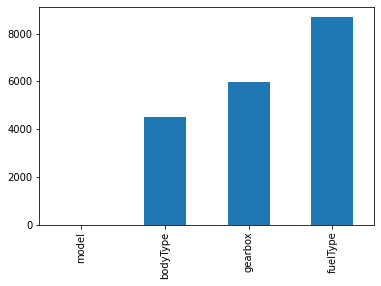

In [25]:
# 缺失情况可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

<AxesSubplot:>

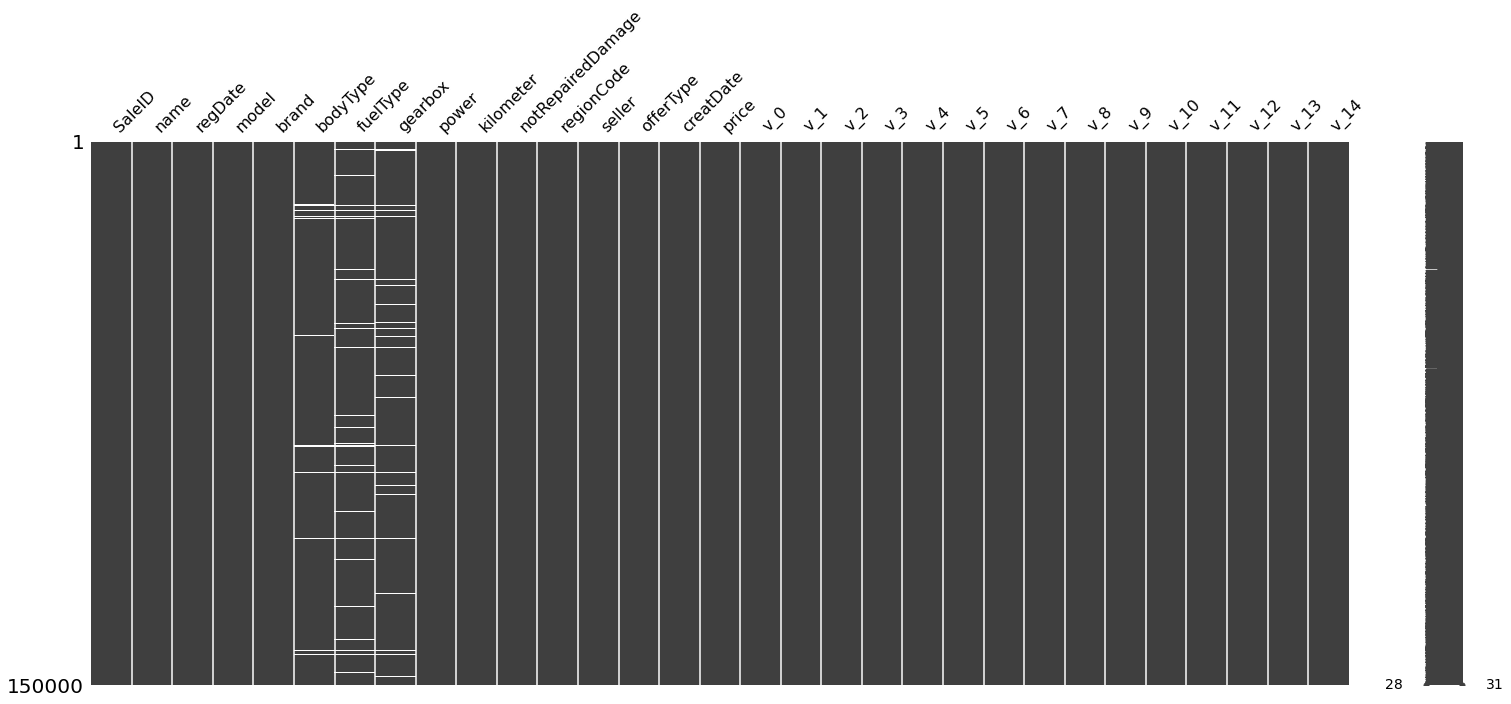

In [30]:
# 可视化看下缺省值
msno.matrix(Train_data)

<AxesSubplot:>

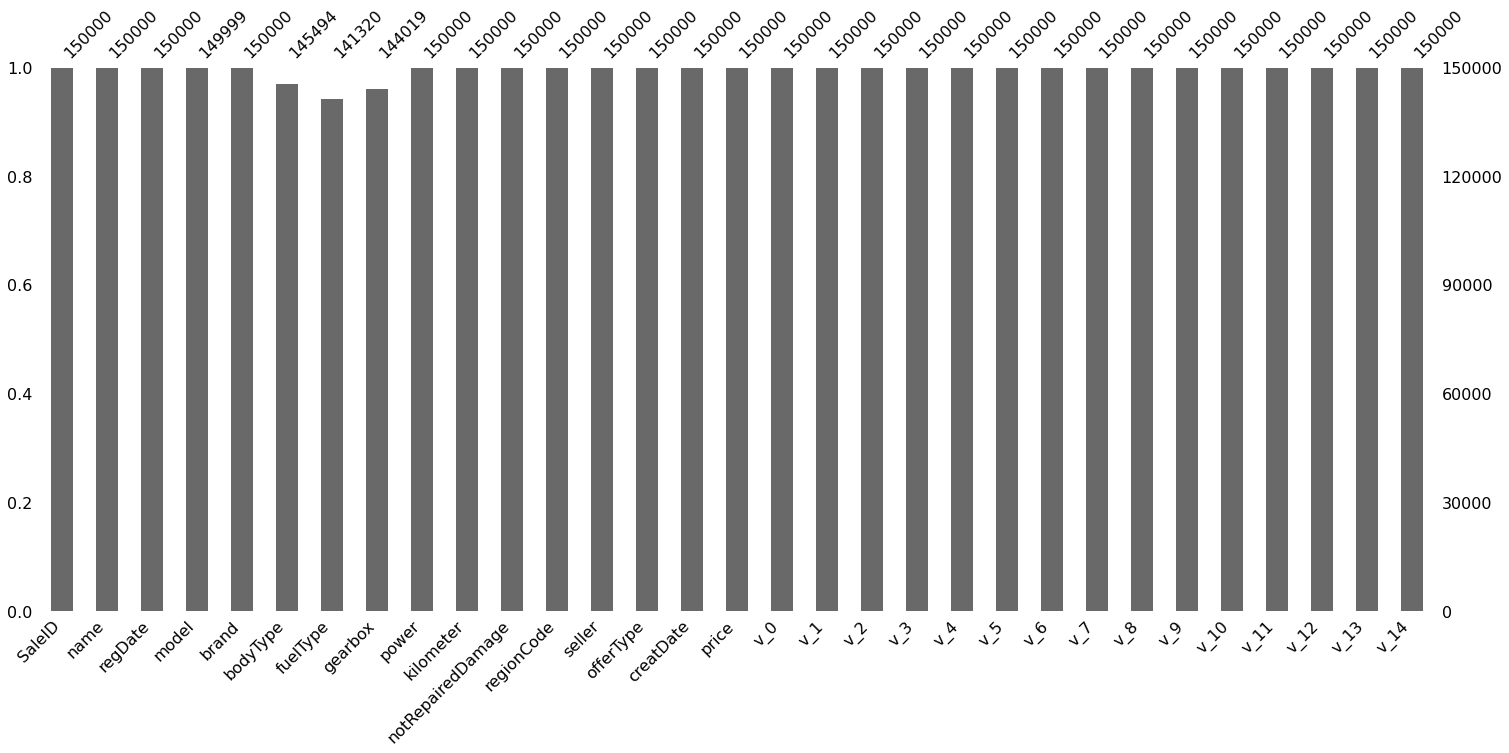

In [31]:
msno.bar(Train_data)

测试集的缺省和训练集的差不多情况, 可视化有四列有缺省，notRepairedDamage缺省得最多

### 2.3.5 查看异常值情况

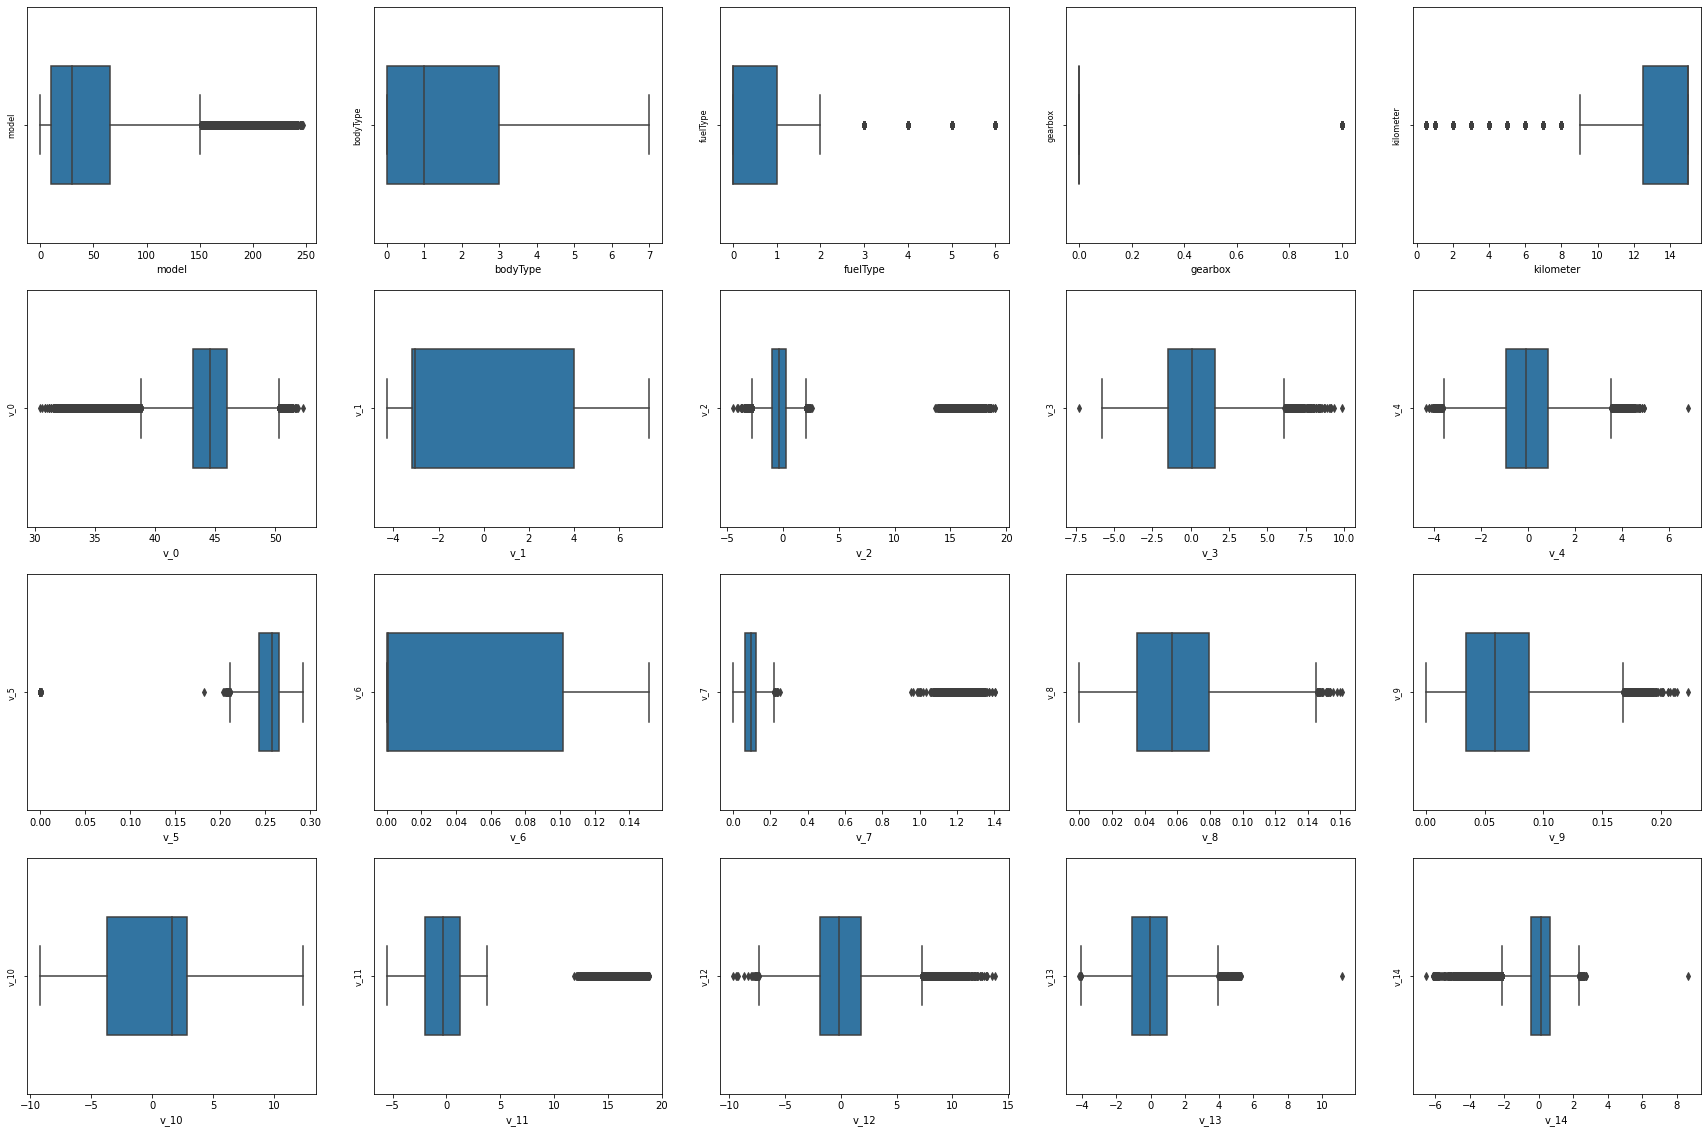

In [142]:
# 箱型图查看数据分布情况，异常值情况

column = [x for x in Train_data.columns if Train_data[x].dtype == np.float][:]

fig = plt.figure(figsize=(30,20))
for i in range(len(column)):
    plt.subplot(4,5,i+1)
    sns.boxplot(Train_data[column[i]],orient="v",width=0.5)
    plt.ylabel(column[i],fontsize=8)
plt.show()

### 2.3.5 查看标签分布情况

In [44]:
Train_data['price'].describe()

count    150000.000000
mean       5923.327333
std        7501.998477
min          11.000000
25%        1300.000000
50%        3250.000000
75%        7700.000000
max       99999.000000
Name: price, dtype: float64

In [45]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
1433        1
8911        1
12877       1
9885        1
8188        1
Name: price, Length: 3763, dtype: int64

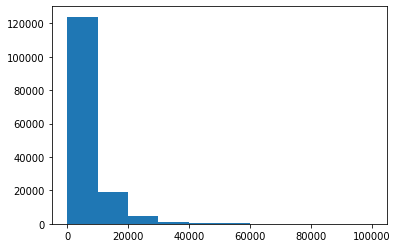

In [83]:
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

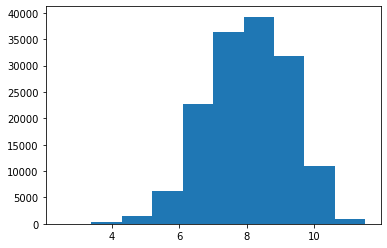

In [85]:
# log变换 z之后的分布较均匀，可以进行log(x + 1)变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price'] + 1), orientation = 'vertical',histtype = 'bar') 
plt.show()

价格不服从正态分布，所以在进行回归之前，它必须进行转换。可以考虑进行log变换。

### 2.3.6 数字特征分析

In [114]:
# 分离label即预测值
Y_train = Train_data['price']

In [115]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分

# numeric_features = Train_data.select_dtypes(include=[np.number])
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

# categorical_features = Train_data.select_dtypes(include=[np.object])
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]


### 2.3.7 数字特征分析

In [116]:
## 1) 相关性分析
numeric_features.append('price')
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

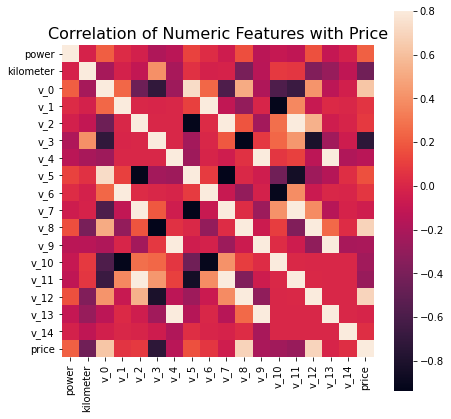

In [117]:
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [118]:
del price_numeric['price']

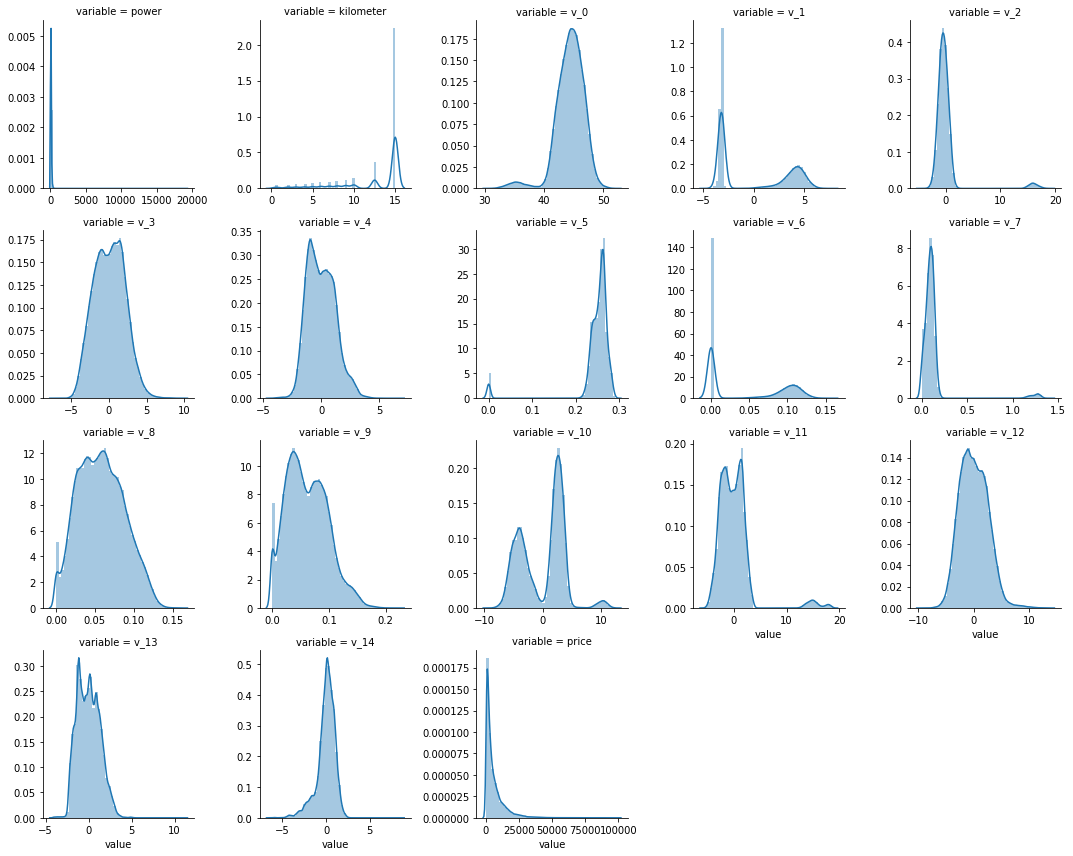

In [119]:
## 2) 每个数字特征得分布可视化

f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### 2.3.7 类别特征分析

In [123]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

In [124]:
## 1) 类别数统计
for fea in categorical_features:
    print(fea,":",Train_data[fea].nunique())

name : 99662
model : 249
brand : 40
bodyType : 9
fuelType : 8
gearbox : 3
notRepairedDamage : 3
regionCode : 7905


In [127]:
## 2) 类别特征分布

for c in categorical_features:
    print(c,"的分布情况：")
    print(Train_data[c].value_counts())



name 的分布情况：
387       282
708       282
55        280
1541      263
203       233
         ... 
26403       1
28450       1
32544       1
102174      1
184730      1
Name: name, Length: 99662, dtype: int64
model 的分布情况：
0.0        11762
19.0        9573
4.0         8445
1.0         6038
29.0        5186
           ...  
242.0          2
245.0          2
209.0          2
247.0          1
MISSING        1
Name: model, Length: 249, dtype: int64
brand 的分布情况：
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
bodyType 的分布情况：
0.0        41420
1.0

### 2.3.9 用pandas_profiling生成数据报告
用pandas_profiling生成一个较为全面的可视化和数据报告(较为简单、方便) 最终打开html文件即可

In [64]:
!pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 258 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 75.1 MB/s eta 0:00:01
     |████████████████████████████████| 599 kB 688 kB/s eta 0:00:01�████████   | 542 kB 688 kB/s eta 0:00:01
     |████████████████████████████████| 70 kB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 81.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 81.8 MB/s eta 0:00:01��████                        | 768 kB 81.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 90.9 MB/s eta 0:00:01        | 

In [ ]:
import pandas_profiling

In [ ]:
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")

## 2.4 经验总结

---
数据探索在机器学习中我们一般称为EDA（Exploratory Data Analysis）：

> 是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

## 2.5 探索结论

#### 问题1.数据缺失较为严重。bodyType、fuelType 、gearbox
#### 问题2.有些特征存在异常值。model v_0 v_4 v_9 v_11 v_12
#### 问题3.标签分布不均衡。
#### 问题4.有些特征相关性不高。v_1 v_2 v_6 v_7  v_13 v_14 


#### 特征工程1：缺失值填充
#### 特征工程2：异常值过滤
#### 特征工程3：标签取对数变换
#### 特征工程4：去除相关性不高的特征
    